# Automatic Language Detecting

In [45]:
# !pip install langdetect
from langdetect import detect

text = "Este es un texto en español."
text = "صفحه اول "
text="人并每日更新的新闻资讯网站"

print(detect(text))  # Output will be 'es' for Spanish

zh-cn


***

# TextBlob Method

A TextBlob object can perform various NLP tasks using its methods. Some of the common tasks include:

**Tokenization**: Breaking the text into individual words or tokens.
Part-of-Speech (POS) Tagging: Assigning a part-of-speech tag (e.g., noun, verb) to each word. Useful for information extraction, language understanding, and syntactic analysis.

**Sentiment Analysis**: Determining the sentiment (positive, negative, neutral) of the text. Sentiment analysis is widely used for understanding public opinion, customer feedback analysis, and social media monitoring.

**Translation**: Translating text from one language to another. Helpful for building multilingual applications and content localization.

**Noun Phrase Extraction**: Extracting noun phrases (e.g., "natural language processing") from the text. Useful for identifying key phrases and topics in a document.

**Spell Correction**: Correcting spelling mistakes in the text. Beneficial for improving the quality of user-generated content and text data preprocessing.

**Text Classification**: Classifying text into predefined categories. Applied in email filtering, content recommendation, and topic modeling.

In [ ]:
from textblob import TextBlob

text = "I love computer science"
blob = TextBlob(text)

print(f"Sentiment of the text: {blob.sentiment}")

Sentiment of the text: Sentiment(polarity=0.5, subjectivity=0.6)


# Stock Market Data (Apple)

The following snippet fetches data from Yahoo Finance for the past 6 months.

You can see in the following example code that you can change the start date.

You can also set a period of time using

```python
import yfinance as yf
import matplotlib.pyplot as plt

# Define start and end dates
start_date = "2020-01-01"  # Replace with your actual start date
end_date = "2021-01-01"    # Replace with your actual end date

# Fetch data for Apple Inc. (AAPL) between the two dates
aapl = yf.Ticker("AAPL")
data = aapl.history(start=start_date, end=end_date)

# Plot the closing prices
data['Close'].plot(title=f"AAPL Closing Price from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()
```

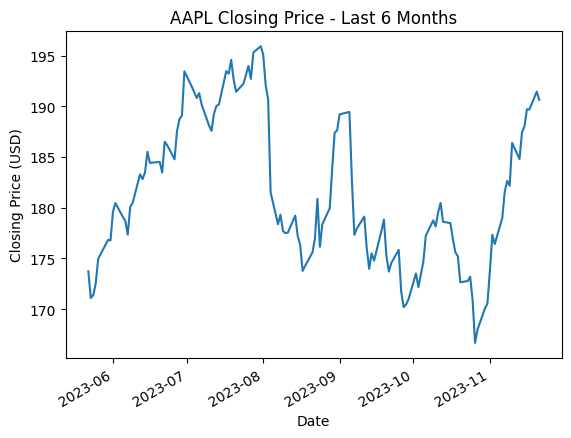

In [2]:
# !pip install yfinance matplotlib
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for Apple Inc. (AAPL) for the last 6 months
aapl = yf.Ticker("AAPL")
data = aapl.history(period="6mo")

# Plot the closing prices
data['Close'].plot(title="AAPL Closing Price - Last 6 Months")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


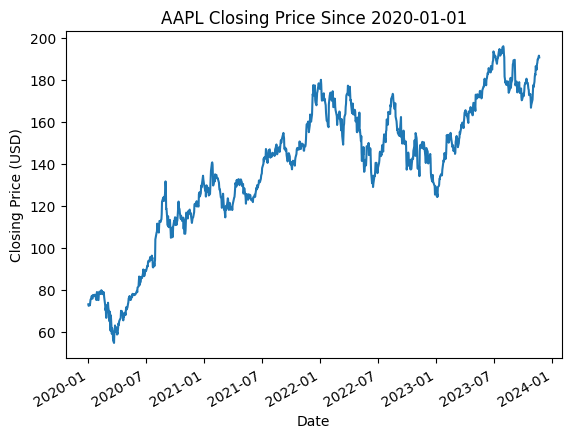

In [46]:
import yfinance as yf
import matplotlib.pyplot as plt

# Specify your start date
start_date = "2020-01-01"  # Example start date in YYYY-MM-DD format

# Fetch data for Apple Inc. (AAPL) from the given start date to the present
aapl = yf.Ticker("AAPL")
data = aapl.history(start=start_date)

# Plot the closing prices
data['Close'].plot(title=f"AAPL Closing Price Since {start_date}")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


# Can we predict the Stock Market?

A simple and basic application of AI on stock market data that's easy to run on Google Colab, without needing heavy package installations, is to perform basic trend analysis using linear regression. This approach can provide insights into the general trend of a stock's closing prices over time.

Here's a step-by-step guide to create a simple linear regression model for stock market trend analysis:

### 1. Install Required Libraries

```python
!pip install yfinance scikit-learn matplotlib
```

### 2. Import Libraries

```python
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
```

### 3. Fetch Stock Data

```python
# Fetching data for a stock (e.g., AAPL for Apple Inc.)
data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')['Close']
```

### 4. Prepare Data for Linear Regression

```python
# Convert index to numerical value for regression analysis
data = data.reset_index()
data['Date'] = data['Date'].map(lambda date: date.toordinal())

# Splitting data into independent (X) and dependent (y) variables
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values
```

### 5. Create and Train Linear Regression Model

```python
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
```

### 6. Plotting the Results

```python
# Predicting the stock prices
y_pred = model.predict(X_test)

# Plotting the actual and predicted prices
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis')
plt.legend()
plt.show()
```

### Brief Explanation:

- This script uses `yfinance` to download historical stock data (closing prices) for Apple Inc.
- We convert the dates to ordinal numbers because linear regression models require numerical inputs.
- The data is then split into training and test sets. The model is trained on the training set.
- We use the model to predict stock prices and plot these predictions against the actual prices to visualize the trend.

[*********************100%%**********************]  1 of 1 completed


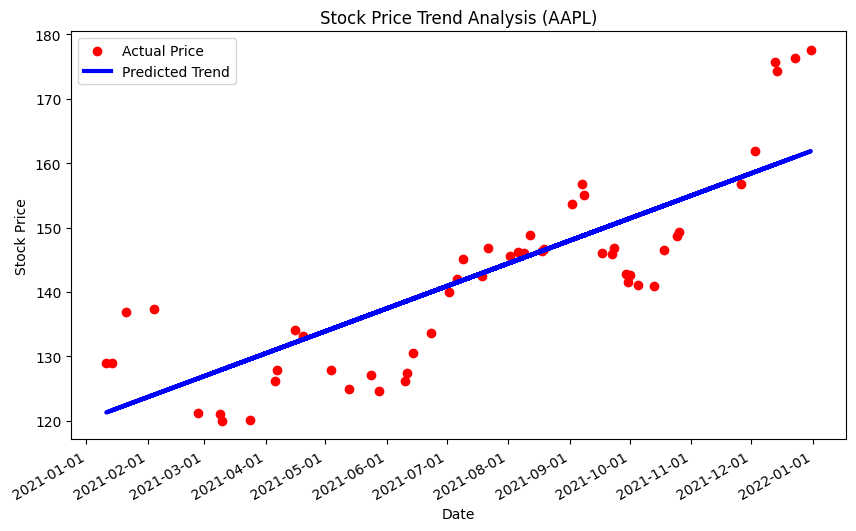

In [8]:
# Install required packages
# !pip install yfinance scikit-learn matplotlib

# Import libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')['Close']

# Convert index (Date) to a numerical value for regression analysis
data = data.reset_index()
data['Date'] = data['Date'].map(lambda date: date.toordinal())

# Splitting data into independent (X) and dependent (y) variables
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Convert ordinal back to datetime for plotting
dates_for_plotting = [dt.date.fromordinal(int(date)) for date in X_test]

# Create figure and plot space
plt.figure(figsize=(10, 6))

# Plotting the actual and predicted prices
plt.scatter(dates_for_plotting, y_test, color='red', label='Actual Price')
plt.plot(dates_for_plotting, y_pred, color='blue', linewidth=3, label='Predicted Trend')

# Setting the format for dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotating the date labels
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis (AAPL)')
plt.legend()
plt.show()


R-squared value: 0.6865590760005327


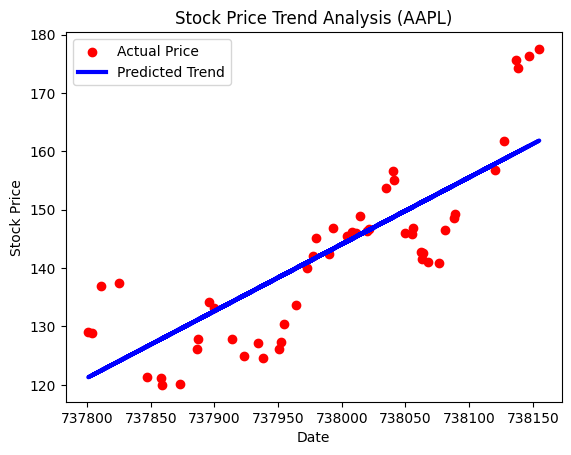

In [ ]:
# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = model.score(X_test, y_test)
print(f"R-squared value: {r_squared}")

# Plotting the actual and predicted prices
plt.scatter(X_test, y_test, color='red', label='Actual Price')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Trend')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend Analysis (AAPL)')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson Correlation Coefficient
correlation, _ = pearsonr(y_test, y_pred)
print(f"Pearson Correlation Coefficient (R): {correlation}")


Pearson Correlation Coefficient (R): 0.8348678485620338


In [ ]:
import datetime as dt

# Example: Predicting stock price for a specific future date
future_date = dt.datetime(2023, 11, 22)
future_date_ordinal = future_date.toordinal()

# Predicting the stock price
predicted_price = model.predict([[future_date_ordinal]])
print(f"Predicted stock price for {future_date.strftime('%Y-%m-%d')}: ${predicted_price[0]:.2f}")


Predicted stock price for 2023-11-22: $241.04


The linear regression model we've trained on historical Apple (AAPL) stock data can technically be used to make future predictions, but there are important limitations and considerations to keep in mind:

1. **Linear Assumption**: Our model assumes a linear relationship between dates and stock prices. This is a very simplistic assumption, and real-world stock prices are influenced by a multitude of complex, often non-linear factors.

2. **Historical Data Only**: The model is based solely on historical data and does not account for future market conditions, economic changes, company performance, political events, or other factors that might influence stock prices.

3. **Predictive Accuracy**: The further you predict into the future, the less accurate the model tends to be, especially with a simplistic model like linear regression.

4. **Model Overfitting**: There's a risk of overfitting to the historical data, meaning the model might capture noise rather than the underlying trend.

5. **Financial Risk**: Stock market prediction is inherently risky, and predictions made with a simple linear regression model should be taken with caution. They should not be used as the sole basis for investment decisions.

# How to improve the model?

Stock prices often do not follow a linear trend and can be influenced by a multitude of factors, making them complex to model. Here are a few alternative approaches you might consider for better modeling stock data:

1. **Polynomial Regression**:
   - Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y. It's particularly useful when the relationship known to be non-linear.
   - In Python, you can implement polynomial regression by transforming your features into polynomial features using `PolynomialFeatures` from `sklearn.preprocessing`.

2. **Time Series Models**:
   - **ARIMA (Autoregressive Integrated Moving Average)**: Useful for univariate time series that show patterns and is not stationary.
   - **SARIMA (Seasonal ARIMA)**: An extension of ARIMA that supports univariate time series data with a seasonal component.
   - **Prophet**: Developed by Facebook, it's good for daily observations that display patterns on different time scales.

3. **Machine Learning Models**:
   - **Random Forest** or **Gradient Boosting Machines**: These ensemble methods can capture complex nonlinear relationships in the data.
   - **Neural Networks**: Deep learning techniques, especially LSTM (Long Short-Term Memory) networks, are effective in modeling sequences and can be particularly useful for time series forecasting.

4. **Feature Engineering**:
   - Incorporate additional features that could influence stock prices, such as trading volume, moving averages, or even external factors like economic indicators or market sentiment.

5. **Regularization Techniques**:
   - Methods like Ridge or Lasso regression can help in managing overfitting, which might be a concern with complex models.

6. **Cross-Validation**:
   - Use techniques like time-series cross-validation to better evaluate the performance of your models.

7. **Hyperparameter Tuning**:
   - Optimize the model parameters for better performance.

Each method has its own strengths and is suitable for different types of data and analysis objectives. It's often useful to try multiple approaches and compare their performance to find the best model for your specific dataset.

[*********************100%%**********************]  1 of 1 completed


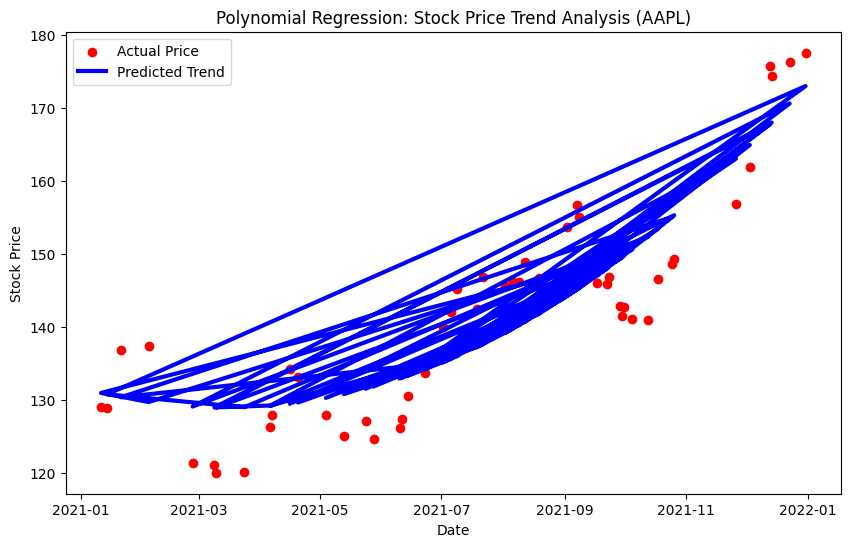

In [44]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt


# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2022-01-01')['Close']

# Convert index (Date) to a numerical value for regression analysis
data = data.reset_index()
data['Date'] = data['Date'].map(lambda date: date.toordinal())

# Splitting data into independent (X) and dependent (y) variables
X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Transforming data into polynomial features
degree = 15  # You can adjust the degree of polynomial based on your dataset
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting the stock prices
y_pred = model.predict(X_test_poly)

# Plotting
# Convert ordinal back to datetime for plotting
dates_for_plotting = [dt.date.fromordinal(int(date)) for date in X_test]

# Create figure and plot space
plt.figure(figsize=(10, 6))

# Plotting the actual and predicted prices
plt.scatter(dates_for_plotting, y_test, color='red', label='Actual Price')
plt.plot(dates_for_plotting, y_pred,color='blue', linewidth=3, label='Predicted Trend')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Polynomial Regression: Stock Price Trend Analysis (AAPL)')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


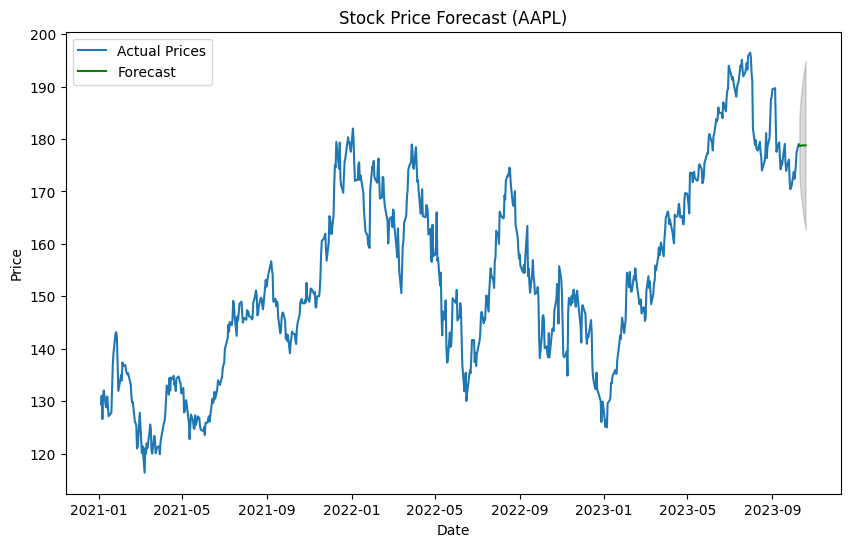

In [41]:
# !pip install yfinance pandas matplotlib statsmodels

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2023-10-10')
close_prices = data['Close']

# Ensure the index is a DatetimeIndex with daily frequency
close_prices.index = pd.DatetimeIndex(close_prices.index).to_period('D')

# Fit the ARIMA model
# The parameters (p,d,q) need to be chosen based on model diagnostics
# freq='D' indicates daily frequency
model = ARIMA(close_prices, order=(5, 1, 0), freq='D') # Example parameters
model_fit = model.fit()

# Summary of the model
# print(model_fit.summary())

# Forecasting the future values
forecast = model_fit.get_forecast(steps=10)
forecast_conf_int = forecast.conf_int()

# Plotting the data and the forecast
plt.figure(figsize=(10,6))
plt.plot(close_prices.index.to_timestamp(), close_prices, label='Actual Prices')

# Generate a date range for the forecast starting the day after the last date in the actual data
last_date = close_prices.index[-1].to_timestamp()
forecast_index = pd.date_range(start=last_date, periods=11, freq='D')[1:]

# Plot the forecast and the confidence interval
plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Forecast')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=.15)

plt.title('Stock Price Forecast (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




[*********************100%%**********************]  1 of 1 completed


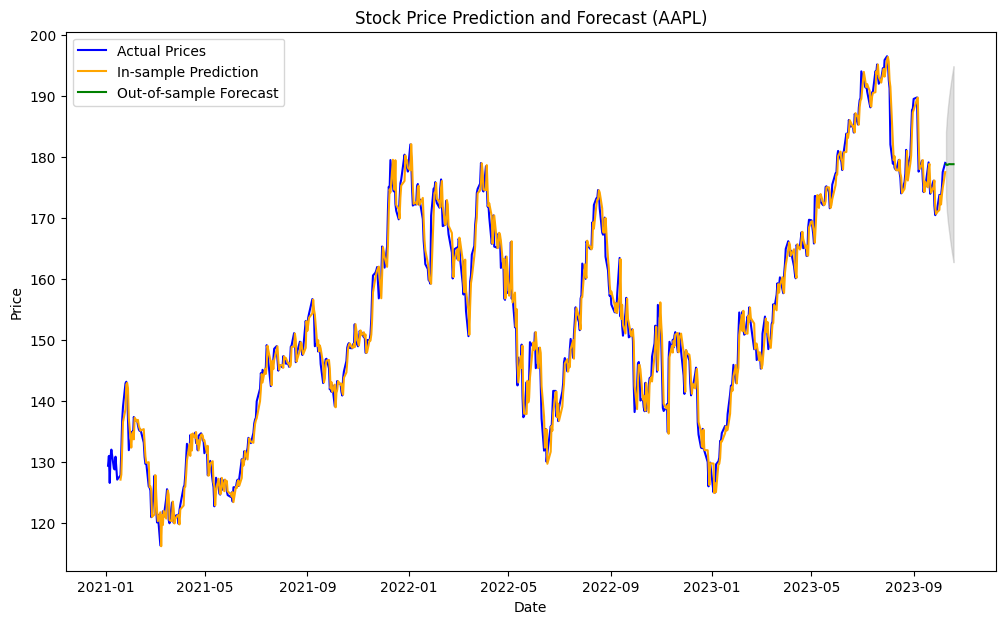

In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Fetch stock data
data = yf.download('AAPL', start='2021-01-01', end='2023-10-10')
close_prices = data['Close']

# Ensure the index is a DatetimeIndex with daily frequency
close_prices.index = pd.DatetimeIndex(close_prices.index).to_period('D')

# Fit the ARIMA model
# The parameters (p,d,q) need to be chosen based on model diagnostics
# freq='D' indicates daily frequency
model = ARIMA(close_prices, order=(5, 1, 0), freq='D') # Example parameters
model_fit = model.fit()

# Summary of the model
# print(model_fit.summary())

# Forecasting the future values
forecast = model_fit.get_forecast(steps=10)
forecast_conf_int = forecast.conf_int()

# Plotting the data, in-sample prediction, and out-of-sample forecast
plt.figure(figsize=(12, 7))

# Actual Prices
plt.plot(close_prices.index.to_timestamp(), close_prices, label='Actual Prices', color='blue')

# In-sample prediction
# Determine a reasonable start point where the prediction stabilizes
stable_start_point = 10  # Change this index as needed
stable_index = close_prices.index[stable_start_point:].to_timestamp()  # Adjusted index for stable prediction
in_sample_pred_stable = model_fit.predict(start=close_prices.index[stable_start_point], end=close_prices.index[-1])

plt.plot(stable_index, in_sample_pred_stable, label='In-sample Prediction', color='orange')

# Out-of-sample forecast
# Generate a date range for the forecast starting the day after the last date in the actual data
last_date = close_prices.index[-1].to_timestamp()
forecast_index = pd.date_range(start=last_date, periods=11, freq='D')[1:]
plt.plot(forecast_index, forecast.predicted_mean, color='green', label='Out-of-sample Forecast')

# Plotting the confidence interval for the forecast
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='grey', alpha=.25)

plt.title('Stock Price Prediction and Forecast (AAPL)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [43]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Fetch the most recent stock data up to yesterday
yesterday = pd.Timestamp.now() - pd.Timedelta(days=1)
data = yf.download('AAPL', start='2021-01-01', end=yesterday.strftime('%Y-%m-%d'))
close_prices = data['Close']

# Check the latest date in the data
latest_data_date = close_prices.index[-1]
print(f"Latest data date: {latest_data_date}")

# Ensure the index is a DatetimeIndex with daily frequency
close_prices.index = pd.DatetimeIndex(close_prices.index).to_period('B')  # 'B' for business days

# Fit the ARIMA model
model = ARIMA(close_prices, order=(5, 1, 0), freq='B')  # 'B' for business days
model_fit = model.fit()

Days_Ahead=2
# Forecasting the next business day's price
forecast = model_fit.get_forecast(steps=Days_Ahead)  # Only need one step if we're at the end of the data
predicted_price = forecast.predicted_mean.iloc[Days_Ahead-1]
confidence_intervals = forecast.conf_int()

# Determine the next business day
next_business_days = close_prices.index[-1] + Days_Ahead

# Print the forecasted price and confidence intervals for the next business day
print(f"Forecasted price for the next business day ({next_business_days.to_timestamp()}): {predicted_price}")
# print(f"95% confidence interval: {confidence_intervals.iloc[0]}")


[*********************100%%**********************]  1 of 1 completed
Latest data date: 2023-11-20 00:00:00
Forecasted price for the next business day (2023-11-22 00:00:00): 191.43656268826766
